We will use the athlete data from the previous noptebook. 
Load it into 2 arrays again. 

In [16]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np

# Cumulative Distributions CDF

We've looked at distributions via histograms and saw that the distribution gives us quite a bit of information on what our data looks like. We can see the range of the data, where the density peaks, if the data follows a standard pattern, etc... Distributions are one of the fundamental descriptors of our data that we'll use for many purposes going forward. 

We can also look at another view of the distribution of the data - the cumulative distribution. The cumulative distribution shows us an accumulative total of the distribution of our data, or what fraction of the data is less than a certain point. 

# 累積分佈 CDF

我們已經通過直方圖查看了分佈，發現分佈為我們提供了相當多的關於數據外觀的信息。 

我們可以看到數據的範圍、密度達到峰值的位置、數據是否遵循標準模式等......

分佈是我們數據的基本描述符之一，我們將在未來用於許多目的。

我們還可以看看數據分佈的另一種觀點——累積分佈。 

累積分佈向我們展示了我們數據分佈的累積總和，或者數據中有多少部分小於某個點。

### Arrays

For this example we'll also use a different data structure to a dataframe to hold our data - an array. Arrays are a very common data structure, we can think of it roughly like a numbered list of items. 

We'll need to use arrays for some things later on, we're looking at them here just to get an introduction. One cool thing about much of the functionality that we'll use is that many functions can accept data in many different formats - dataframes, series, arrays, lists, and more! All of these data structures have, to different degrees, overlapping characteristics - here the important characteristic is that they are all iterable, or they all hold things in something that can be treated like a "list of things". Because of this, we can feed in data that is in any of these data structures interchangeably and get the same results. We need to build our comfort level in using data that is stored differently. 

### 數組

對於這個例子，我們還將使用與數據框不同的數據結構來保存我們的數據——一個數組。 

數組是一種很常見的數據結構，我們可以把它粗略地想像成一個編號的項目列表。

稍後我們需要使用數組來做一些事情，我們在這裡查看它們只是為了獲得介紹。 

關於我們將使用的大部分功能，一件很酷的事情是許多函數可以接受許多不同格式的數據——數據框、系列、數組、列表等等！ 

所有這些數據結構都在不同程度上具有重疊的特徵——這裡的重要特徵是它們都是可迭代的，或者它們都將事物保存在可以被視為“事物列表”的事物中。 

因此，我們可以互換地輸入任何這些數據結構中的數據，並獲得相同的結果。 

我們需要建立使用不同存儲方式的數據的舒適度。

In [17]:
# PLEASE TAKE A LOOK AT THE NOTE IN THE COMMENTS IN THIS BLOCK.
dfNBA = pd.read_csv("data/NBA.csv")
dfNFL = pd.read_csv("data/NFL.csv")

# Take the height column and make a Series (effectively a 1D dataframe), with only 1 column:
nba = dfNBA["Height"]
nfl = dfNFL["Height (inches)"]

#################################################################
# Note: Originally when I showed this, the above two lines were slightly different. 
# They were (with the A added, obviously):
nbaA = np.array(dfNBA["Height"])
nflA = np.array(dfNFL["Height (inches)"])
# This code makes a slightly different data structure - a numpy array. # 這段代碼創建了一個略有不同的數據結構——一個 numpy 數組。
# An array is a 1D data structure - effectively just a big list. # 數組是一維數據結構——實際上只是一個大列表。
# The code below works basically the same with either. That's because both are "iterable" # 下面的代碼與兩者基本相同。那是因為兩者都是“可迭代的”
# That means (basically), something that has can give values one at a time. # 這意味著（基本上），具有的東西可以一次賦予一個值。
# Functions below can take either, with little/no change, or they can take a pandas Series # 下面的函數可以採用其中一種，幾乎沒有變化，也可以採用 pandas 系列

# Which is kind of a pandas take on an array. I point this out for a few reasons:
#  - Examples will sometimes show different data structures, and the rest of the code doesn't really change. # - 示例有時會顯示不同的數據結構，其餘代碼並沒有真正改變。
#  - Some things will need other data structures, most notably ML needs arrays. # - 有些東西需要其他數據結構，最值得注意的是 ML 需要數組。
# We don't need to understand the problem differently when different data structures are used. # 我們不需要在使用不同的數據結構時對問題有不同的理解。
# It is basically like getting groceries with a bin, a reusable bag, or a plastic bag. # 這基本上就像用垃圾桶、可重複使用的袋子或塑料袋買雜貨。
# The all allow us to do the same thing (grocery shop/Machine Learn), and they can be used # The all 允許我們做同樣的事情（雜貨店/機器學習），並且它們可以被使用
# Largely interchabably. Sometimes one is better than the other for a specific task. 
# This type of thing is very common - you can do anything you want in code, so there are almost
# Always more than one way to do something. Flexible, but confusing. 

# Dump the non-numbers
nba = nba[~np.isnan(nba)]
nfl = nfl[~np.isnan(nfl)]

#### Data Structures and Basic Statistics

No matter the type of data structure, the statistics that describe it remain the same. 

We are used to the Pandas statistic functions - these are functions that are built into the Pandas Dataframe objects, we can tell by the syntax of "dataframe.function()". These functions "belong" to the dataframe, so they only work with that object. 

In [18]:
dfNFL["Weight (lbs)"].mean(), dfNFL["Weight (lbs)"].std()

(229.22066468080135, 42.73273161153381)

In [19]:
dfNFL.columns

Index(['Age', 'Birth Place', 'Birthday', 'College', 'Current Status',
       'Current Team', 'Experience', 'Height (inches)', 'High School',
       'High School Location', 'Name', 'Number', 'Player Id', 'Position',
       'Weight (lbs)', 'Years Played'],
      dtype='object')

On the other hand, arrays are not Pandas Dataframes, so they don't have those functions available to them. To get stats like the mean we need to use a different function. If we look at the function calls below they are in the format "numpy.function()" - this is an indicator that the function is not something that "belongs" to the data structure object itself, rather the function can be called with any data that we provide as an argument. 

This distinction is minor now, but will become more clear and relevant as you get experience programming. 

另一方面，數組不是 Pandas Dataframes，因此它們沒有可用的功能。 

要獲得像均值這樣的統計數據，我們需要使用不同的函數。 

如果我們查看下面的函數調用，它們的格式為“numpy.function()”

——這表明該函數不“屬於”數據結構對象本身，而是可以用任何函數調用 我們作為論據提供的數據。

現在這種區別很小，但是隨著您獲得編程經驗，這種區別會變得更加清晰和相關。

In [20]:
#Check the means
print("NBA Mean Height: "+str(np.mean(nba)))
print("NFL Mean Height: "+str(np.mean(nfl)))

NBA Mean Height: 197.44075829383885
NFL Mean Height: 73.50839891929989


#### Applying Functions

One thing that is often useful is to do bulk actions on our data, for example to convert between cm and inches. Rather than trying to do something complex like loop through each row of the data and generate the calculation, we can state the calculation and tell our program to apply it to every row. 

This apply function will have the effect of applying whatever calculation defined (x * 2.54) to each item in that array. 

#### 應用函數

通常有用的一件事是對我們的數據執行批量操作，例如在厘米和英寸之間進行轉換。 

與其嘗試做一些複雜的事情，比如遍歷每一行數據並生成計算，我們可以聲明計算並告訴我們的程序將它應用於每一行。

此應用函數將具有將定義的任何計算 (x * 2.54) 應用於該數組中的每個項目的效果。

In [21]:
#Correct the heights to cm, so they are the same as NBA
#This .apply() applies the function inside to an entire dataframe.
#The "lambda x" basically means "grab each row one by one, and that row is (temporarily) x"
#The part after the colon means "take x, and do this to it"
#So this will, more or less, grab each row, and do the function after the colon, one row at a time.

# nfl = nfl * 2.54
nfl = nfl.apply(lambda x: x * 2.54)
nfl

0        180.34
1        177.80
2        187.96
3        185.42
4        195.58
          ...  
17167    180.34
17168    190.50
17169    182.88
17170    185.42
17171    185.42
Name: Height (inches), Length: 17026, dtype: float64

## Percentiles

The previous 2 methods of looking at the distribution showed us versions of "how many of X are Y" - e.g. how many players are 187cm tall. 

We may also want/need to look at cumulative measurements - "how many of X are over/under Y" - e.g. how many players are over 215cm, or under 172.523cm. Enter percentiles...

Percentiles measure how far along the scale a value is - how many items a value is larger than, and the inverse, how many are higher than it. E.g. if you are in a class of 10 people, and you are the second tallest, you are in the 90th percentile of height - 90% of people in that sample are the same or shorter than you; the remaining 10% are taller. If you've been scored on a standardized test, you've probably gotten some kind of number like this. (The book has a more thorough explationation of percentile stuff)

In order to calculate things, we need two functions that are basically inverses of eachother. Percentile rank takes in a value and calculates what percentile that is in. Percentile does the opposite, takes in a percentile, and calculates the value. (Read the book on this, it has the details)
Percentile rank: value->ranking on percentile scale. e.g. I scored 72%, and the function tells me I'm in the 80th percentile. 
percentile: ranking->value. e.g. I'm in the 64th percentile of my graduating class, that means I have a 3.1 GPA.

百分位數衡量一個值在尺度上有多遠——一個值大於多少項目，反之，有多少項目高於它。

例如。如果你在一個 10 人的班級中，並且你是第二高的，那麼你在身高的第 90 個百分位 - 該樣本中 90% 的人與你相同或比你矮；

剩下的 10% 更高。如果您在標準化考試中獲得過分數，您可能會得到類似這樣的數字。 （這本書對百分位的東西有更徹底的解釋）

為了計算事物，我們需要兩個基本上互為反函數的函數。

百分位數排名接受一個值併計算其所在的百分位數。

百分位做相反的事情，接受一個百分位數併計算該值。 （閱讀這本書，它有詳細信息）


百分位排名：值->百分位排名。例如我得分為 72%，該函數告訴我我處於第 80 個百分位。


百分位：排名->價值。例如我在畢業班的第 64 個百分位，這意味著我的 GPA 為 3.1。

In [22]:
#The percentile functions
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1

    prob = count / len(sample)
    return prob

### Visualizing a CDF

The CDF is basically a different look at the percentile rank - given a value, how far "up the scale" are we.

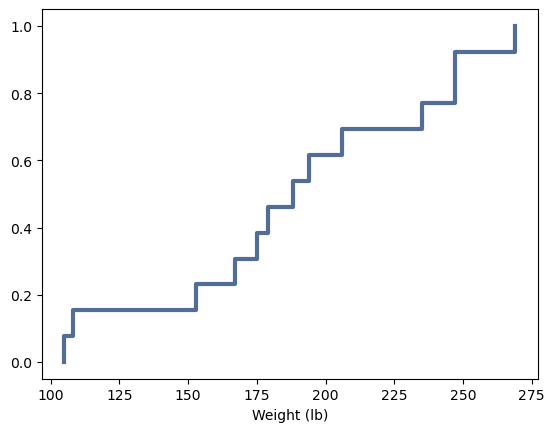

<Figure size 800x600 with 0 Axes>

In [23]:
#Simple dummy example
#Pretend these are weights in pounds
sample = thinkstats2.Cdf([105,235,153,194,175,206,167,188,179,108,247,269,247])
thinkplot.Cdf(sample)
thinkplot.Show(xlabel="Weight (lb)")

We can read these CDF graphs like this... If I am 225lb, I can look that up on the x-axis. The corresponding y value is my percentile rank - I'm in apx the 70th percentile, or I'm heavier than about 70% of the people in the sample. 

How does the shape of a CDF relate to the shape of a PDF? With different standard deviations? Create a CDF with the numbers 1-10, what does that look like? What can you infer about the distribution?

Create a CDF for both the NBA and NFL heights. How does that relate back to the histograms? 

{'xscale': 'linear', 'yscale': 'linear'}

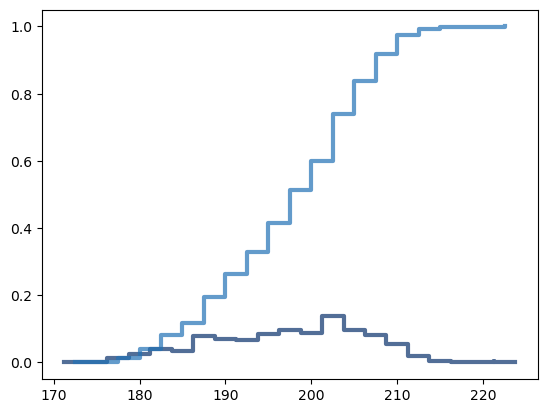

In [28]:
#Create and show CDF of NBA heights
nba_pmf = thinkstats2.Pmf(nba)
nba_cdf = thinkstats2.Cdf(nba)
thinkplot.Pmf(nba_pmf)
thinkplot.Cdf(nba_cdf)

{'xscale': 'linear', 'yscale': 'linear'}

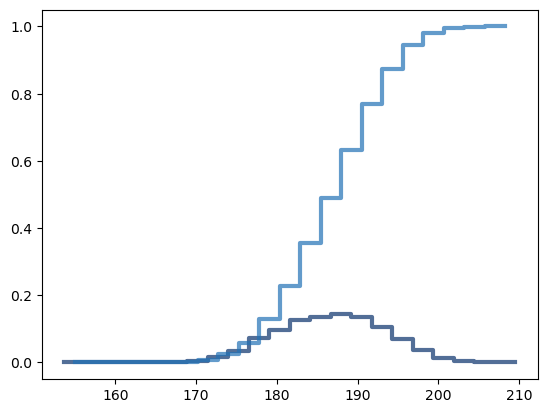

In [29]:
#Create and show CDF of NFL heights
nfl_pmf = thinkstats2.Pmf(nfl)
nfl_cdf = thinkstats2.Cdf(nfl)
thinkplot.Pmf(nfl_pmf)
thinkplot.Cdf(nfl_cdf)

Ok, we can run some calculations. 

Make both into inches, round to 1 inch. The reason for this conversion and rounding is so that there are more results for each value because inches are "bigger". This isn't "needed", but it makes this more clear to visualize. 

好的，我們可以進行一些計算。

將兩者都製成英寸，四捨五入為 1 英寸。 

這種轉換和舍入的原因是每個值都有更多的結果，因為英寸“更大”。 

這不是“需要的”，但可以清楚地看到這一點。

In [ ]:
# Convert to inches and make CDFs
nbaIn = nba.apply(lambda x: x / 2.54)
nflIn = nfl.apply(lambda x: x / 2.54)
nbaIn = round(nbaIn, 0)
nflIn = round(nflIn, 0)

#Make CDF objects with the rounded stuff
nbaRounded = thinkstats2.Cdf(nbaIn)
nflRounded = thinkstats2.Cdf(nflIn)

In [38]:
nflIn.describe()

count    17026.000000
mean        73.508399
std          2.577632
min         61.000000
25%         72.000000
50%         74.000000
75%         75.000000
max         82.000000
Name: Height (inches), dtype: float64

In [52]:
# 有多少 % 比例的人比 65 inches 矯
nflRounded.PercentileRank(50)

0

In [54]:
# 有多少 & 比例的人比 50 inches 高
100 - nflRounded.PercentileRank(50)

100

In [51]:
# 有多少 % 比例的人比 50 inches 矯
nflRounded.Prob(50)

0

In [50]:
# 超過 50% 的人在身高 74 inches 
nflRounded.Percentile(50)

74.0

In [53]:
# 高於 50% 的人超過 74 inches
nflRounded.Value(0.50)

74.0

In [55]:
# share of NFL between 71 inches and 75 inches.
# NFL rounded - CDF object
nflRounded.Prob(75) - nflRounded.Prob(71)
# about 54% 

0.5409961235757078

In [61]:
# NFL median height?
print(nflRounded.Value(0.5))
print(np.median(nflRounded.ValueArray()))

74.0
72.5


## Exercises

Try these! 

<ul>
<li> What is the probability that someone in the NBA is 80in tall?
<li> What is the probability someone is over 74in in the NFL?
<li> How tall does someone need to be to get into the 75th percentile in each dataset?
<li> What is your percentile rank in each dataset? 
</ul>

In [68]:
#E.g. What is the probability that someone in the NBA is 80 inches tall
nbaRounded.Prob(81) - nbaRounded.Prob(79)

0.23696682464454977

In [69]:
# And if we want to see in in pretty printing
print(str(round(nbaRounded.Prob(81) - nbaRounded.Prob(79), 3) * 100) + "%")

23.7%


In [70]:
# And if someone is over 74 inches in the NFL?
# Think about why there's the extra math in there.
res = PercentileRank(nflIn, 74)
print(str(round((1 - res), 1) * -1) + "%")

62.3%


In [75]:
# If someone is in the top 20% of NFL height, how to they rank in the NBA?
# how tall is the top 20% in NFL
print('the height in top 20% in NFL: ', nflRounded.Percentile(80), 'inches')
print('the percentage of 76 inches in NBA: ', nbaRounded.PercentileRank(76))

the height in top 20% in NFL:  76.0 inches
the percentage of 76 inches in NBA:  32.93838862559242


In [ ]:
#Using the Percentile/Rank functions, and the CDF functions on pg 49 of the book
#Can you look for anything interesting in the data?
#Who's over X, who's under? How you'd your height score on the scale?
#How many people are shorter than you (or a friend) in either leauge?

In [81]:
total = 0
i = 0

while i < 10 :
    total = nbaRounded.Sample(1)
    i +=  1
print(total)

[74.]


In [87]:
for player in dfNBA :
    print(dfNBA['Name'], dfNBA['Height'])

0           AJ Price
1       Aaron Brooks
2       Aaron Gordon
3      Adreian Payne
4         Al Horford
           ...      
485     Xavier Henry
486      Zach LaVine
487    Zach Randolph
488    Zaza Pachulia
489     Zoran Dragic
Name: Name, Length: 490, dtype: object 0      185.0
1      180.0
2      202.5
3      205.0
4      205.0
       ...  
485    195.0
486    192.5
487    202.5
488    207.5
489    192.5
Name: Height, Length: 490, dtype: float64
0           AJ Price
1       Aaron Brooks
2       Aaron Gordon
3      Adreian Payne
4         Al Horford
           ...      
485     Xavier Henry
486      Zach LaVine
487    Zach Randolph
488    Zaza Pachulia
489     Zoran Dragic
Name: Name, Length: 490, dtype: object 0      185.0
1      180.0
2      202.5
3      205.0
4      205.0
       ...  
485    195.0
486    192.5
487    202.5
488    207.5
489    192.5
Name: Height, Length: 490, dtype: float64
0           AJ Price
1       Aaron Brooks
2       Aaron Gordon
3      Adreian Payne
4     